# GUC K-nearest neighbor Classification

### Import packages and data set
#### Import the "Classified data" file 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


In [3]:
data=pd.read_csv("Classified_Data.csv")

In [4]:
data.head()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [5]:
data.columns

Index(['Unnamed: 0', 'WTT', 'PTI', 'EQW', 'SBI', 'LQE', 'QWG', 'FDJ', 'PJF',
       'HQE', 'NXJ', 'TARGET CLASS'],
      dtype='object')

In [6]:
data.shape

(1000, 12)

### Scale the features using sklearn.preprocessing package

**Instantiate a scaler standardizing estimator**

In [7]:
from sklearn import preprocessing

In [8]:
scaler = preprocessing.StandardScaler()

In [9]:
scaler

StandardScaler()

**Fit the features data only to this estimator (leaving the TARGET CLASS column) and transform**

In [12]:
scaler.fit(data.drop('TARGET CLASS',axis=1))
scaled_features = scaler.transform(data.drop('TARGET CLASS',axis=1))

In [15]:
data.head()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [14]:
data_feat = pd.DataFrame(scaled_features,columns=data.columns[:-1])
data_feat.head()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-1.730320,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.726856,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-1.723391,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,-1.719927,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,-1.716463,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


### Train/Test split, model fit and prediction

In [18]:
from sklearn.model_selection import train_test_split
X = data_feat
y = data['TARGET CLASS']
X_train, X_test, y_train, y_test = train_test_split(scaled_features,data['TARGET CLASS'],
                                                    test_size=0.50, random_state=101)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((500, 11), (500, 11), (500,), (500,))

In [19]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [20]:
pred = knn.predict(X_test)

### Evaluation of classification quality using Confusion Matrix

In [34]:
#https://intellipaat.com/blog/confusion-matrix-python/
#https://scikit-learn.org/stable/modules/model_evaluation.html
from sklearn.metrics import confusion_matrix

In [35]:
conf_matrix=confusion_matrix(y_test, pred)

In [36]:
print(conf_matrix)

[[232  18]
 [ 26 224]]


### what does this mean?
###### True positive is 232
###### True negative is 224
###### False positive is 18
###### False negative is 26

### Evaluate the model using performance metrics

In [28]:
from sklearn.metrics import classification_report

In [29]:
classification_report=classification_report(y_test, pred)

In [30]:
print(classification_report)

              precision    recall  f1-score   support

           0       0.90      0.93      0.91       250
           1       0.93      0.90      0.91       250

    accuracy                           0.91       500
   macro avg       0.91      0.91      0.91       500
weighted avg       0.91      0.91      0.91       500



***Print Misclassification error rate***

In [40]:
#https://towardsdatascience.com/evaluating-machine-learning-classification-problems-in-python-5-1-metrics-that-matter-792c6faddf5
True_Pos = conf_matrix[1][1]
True_Neg = conf_matrix[0][0]
False_Pos = conf_matrix[0][1]
False_Neg = conf_matrix[1][0]
True_Pos,True_Neg,False_Pos,False_Neg

(224, 232, 18, 26)

In [41]:
# calculate accuracy
conf_accuracy = (float (True_Pos+True_Neg) / float(True_Pos + True_Neg + False_Pos + False_Neg))
conf_accuracy

0.912

In [42]:
# calculate mis-classification
conf_misclassification = 1- conf_accuracy
conf_misclassification

0.08799999999999997

# Choosing 'k' using cross validation error
#### Plot the error rate vs. K Value

In [51]:
from sklearn.model_selection import cross_val_score

In [55]:
#https://scikit-learn.org/stable/modules/model_evaluation.html
score=cross_val_score(knn,data_feat,data['TARGET CLASS'])
np.mean(score)

0.9029999999999999

In [59]:
def get_cv_error(k):
    knn_new= KNeighborsClassifier(n_neighbors=k)
    knn_new.fit(X_train,y_train)
    score=cross_val_score(knn_new,data_feat,data['TARGET CLASS'])
    np.mean(score)
    return 1-np.mean(score)

In [72]:
error_list=[]
error_list_percent=[]
for k in range(1,10):
    error_list.append(get_cv_error(k))
    error_list_percent.append(get_cv_error(k)*100)


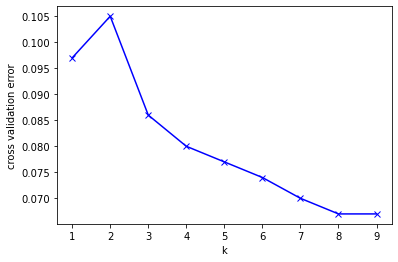

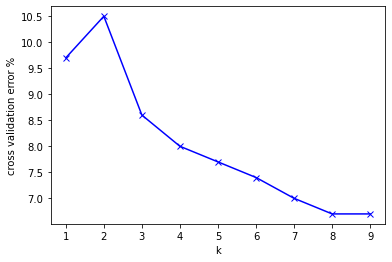

In [73]:
plt.xlabel('k')
plt.ylabel('cross validation error')
plt.plot(range(1, 10), error_list, 'bx-')
plt.figure()
plt.xlabel('k')
plt.ylabel('cross validation error %')
plt.plot(range(1, 10), error_list_percent, 'bx-')